In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

In [3]:
def plotAns(Ans, Map, color):
    window = Ans[0][2]
    if Ans[0][0] == 0 or Ans[0][1][0] == 0 or Ans[0][1][1] == 0:
        return
    for i in range(Ans[0][2][0]):
        for j in range(Ans[0][2][1]):
            Map[i][j] = color
    if Ans[0][0] != 0:
        if Ans[0][3] == AS_WIDTH:
            plotAns(Ans[1], Map[window[0]:,:window[1]],color + 10)
            plotAns(Ans[2], Map[:,window[1]:],color + 5)
        else:
            plotAns(Ans[1], Map[window[0]:,:], color + 10)
            plotAns(Ans[2], Map[:window[0]:,window[1]:], color + 5)

In [4]:
def selectBest(array):
    best = array[0]
    bestSum = best[0][0][0] + best[1][0][0]
    for candidate in array:
        if candidate[0][0][0] + candidate[1][0][0] > bestSum:
            best = candidate
            bestSum = best[0][0][0] + best[1][0][0]
    return best, bestSum

In [5]:
def bestSolve(Width, High, window, asWhat):
    nextSolves = []
    if Width >= window[0] and High >= window[1]:
        nowSolve = (window[0] * window[1], (Width, High), window, asWhat)
        
        if asWhat == AS_WIDTH:
            newWidth = [Width - window[0], Width]
            newHigh  = [window[1], High - window[1]]
        else:
            newWidth = [Width - window[0], window[0]]
            newHigh  = [High, High - window[1]]
        
        for s in Sizes:
            for asNext in AS:
                nextSolves.append([
                    bestSolve(newWidth[0], newHigh[0], s, asNext[0]),
                    bestSolve(newWidth[1], newHigh[1], s, asNext[1])
                ])
        
        
        bestNext, nextSum = selectBest(nextSolves)
        
        # update the nowSolve
        nowSolve = (nowSolve[0] + nextSum, nowSolve[1], nowSolve[2], nowSolve[3])
        nowSolve = [nowSolve, bestNext[0], bestNext[1]]
        return nowSolve
    else:
        nowSolve = [(0, (Width, High), window, asWhat), [], []]
        return nowSolve

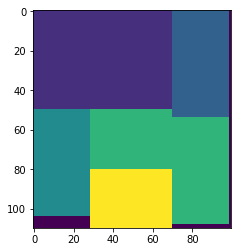

96.8909090909 %


In [8]:
Width = 110
High = 100

Sizes = [(54, 29), (70, 50), (30, 41)] # pay attention
Sizes.extend([(s[1], s[0]) for s in Sizes])
# we need to range the Size, so we don't need to range the Map

Map = np.ones((Width, High))
maxUse = 0
Ans = 0 # ans is the split picture of the program

AS_WIDTH = True
AS_HIGH  = False
AS = [(True, True), (False, False), (True, False), (False, True)]

ans = bestSolve(Width, High, (0,0), True)
plotAns(ans,Map,0)
# pprint(ans)

plt.imshow(Map)
plt.show()
print ans[0][0]/(Width * High) * 100 , "%"

In [7]:
# ans structure
"""
[
    (usage, nowSize, windowSize, True/False),
    [
        
    ],
    [
        
    ]
]
"""

'\n[\n    (usage, nowSize, windowSize, True/False),\n    [\n        \n    ],\n    [\n        \n    ]\n]\n'